# Abstract

A swinging Atwood machine consists of two non-colliding masses connected by an inextensible string over two frictionless support points (see figure below). The mass M moves only vertically, that is up and down, while the mass m oscillate in the vertical plane.

The lagrangian can be written as 
$$  $$

![](/Users/ammar-imac/projects/python/jupyter/PHYS300/a.png)

# The Problem
We consider a system as the above picture. There are two masses $m$ and $M$ hangged from two supports by an inextensible string of length $b$. The spherical mass is allowed to swing with an angle of $\theta$ as a pendulum. Thus pendulum has is $r$ long and it can change. The cubic mass is only allowed to move vertically.

# The Lagrangian
## The Mass $m$

![](/Users/ammar-imac/projects/python/jupyter/PHYS300/b.png)

For the spherical mass $m$ and using a cartesian coordinate as in the above picture, we write the Lagrangian as,
$$ L_m = \frac{m}{2} (\dot{x}^2 + \dot{y}^2) - mgy $$
But we have a constraint on the coordinates as
$$ 
\begin{cases}
    x = r \sin(\theta) \\
    y = -r \cos(\theta)
\end{cases} \qquad \Rightarrow \qquad
\begin{cases}
    \dot{x} = \dot{r} \sin(\theta) + r \cos(\theta) \\
    \dot{y} = -\dot{r} \cos(\theta) + \sin(\theta)
\end{cases}
$$
So
$$ \dot{x}^2 + \dot{y}^2 = \dot{r}^2 + r^2 \dot{\theta}^2 $$
So $L_m$ becomes
$$ L_m = \frac{m}{2} (\dot{r}^2 + r^2 \dot{\theta}^2) + mgr \cos(\theta) $$

## The Mass $M$ 
![](/Users/ammar-imac/projects/python/jupyter/PHYS300/c.png)

The lgransgian for the cubic mass $M$ with coordiante system as above is 
$$ L_M = \frac{M}{2} (\dot{x}^2 + \dot{y}^2) - Mgy $$
The constraint is 
$$ 
\begin{cases}
    x = 0  \\
    y = b -r \qquad \text{we ignore the horizontal length of the string}
\end{cases}
$$

Hence,
$$ L_M = \frac{M}{2} \left[ \frac{d}{dt} (b-r) \right]^2 - Mgy = \frac{M}{2} \dot{r}^2 - Mgr $$

## The Entire System
We add up the two indivisual Lgrngian to get the one of the systme, then
$$ L_s = L_m + L_M = \left[ \frac{m}{2} (\dot{r}^2 + r^2 \dot{\theta}^2) + mgr \cos(\theta) \right] + \left[  \frac{M}{2} \dot{r}^2 - Mgr \right] $$
Hence,
$$ L_s = \frac{m+M}{2}\dot{r}^2 + \frac{m}{2} r^2 \dot{\theta}^2 + gr (m\cos(\theta) - M) $$

## The Lagrange Equation of Motions

Starting with the equtaion
$$ \frac{\partial L_s} {\partial r} - \frac{d}{dt} \frac{\partial L_s}{\partial \dot{r}} =0 $$
Then, 
$$ 
\frac{\partial L_s} {\partial r} = mr \dot{\theta}^2 + g(m\cos(\theta) - M) \quad \text{and} \quad
\frac{d}{dt} \frac{\partial L_s}{\partial \dot{r}} = (m+M) \ddot{r}
$$
Hence, 
$$ (m+M) \ddot{r} - mr \dot{\theta}^2 - gm \cos(\theta) + gM = 0 $$

Now for doing the same for $\theta$
$$ \frac{\partial L_s} {\partial \theta} - \frac{d}{dt} \frac{\partial L_s}{\partial \dot{\theta}} =0 $$
So we get
$$ 
    \frac{\partial L_s} {\partial \theta} = - mgr \sin(\theta) \quad \text{and} \quad
    \frac{d}{dt} \frac{\partial L_s}{\partial \dot{\theta}} = mr^2 \ddot{\theta} + 2mr \dot{r} \dot{\theta}
$$
Hence, 
$$ mr^2 \ddot{\theta} + 2mr\dot{r}\dot{\theta} + mgr \sin(\theta) = 0 $$

To add up, we have these two EOMs, 
$$ (m+M) \ddot{r} - mr \dot{\theta}^2 - gm \cos(\theta) + gM = 0 $$
$$ mr^2 \ddot{\theta} + 2mr\dot{r}\dot{\theta} + mgr \sin(\theta) = 0 $$

Let us divide those two by $m$, and define the mass ration $\mu = M/m$, so get the follwoing equations
$$ (1+\mu) \ddot{r} - r \dot{\theta}^2 - g \cos(\theta) + g\mu = 0 $$
$$     r^2 \ddot{\theta} + 2r\dot{r}\dot{\theta} + gr \sin(\theta) = 0 $$

Finaly we isolate $\ddot{r}$, and $\ddot{\theta}$, like so
$$ 
    \ddot{r} = \frac{r \dot{\theta}^2 + g \cos(\theta) - g\mu }{1+\mu}, \qquad
    \ddot{\theta} = - \frac{2r \dot{\theta} + g\sin{\theta}}{r} 
$$
We will use python to interate those equations for different initial values

# Writing The Program

In [9]:
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

# graph settings
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
plt.rcParams['figure.figsize'] = [13, 5]
backend_inline.set_matplotlib_formats('svg', 'pdf')

## Define the ODE of the radial coordinate $\theta$
To start, we need to write the last two second-order ODEs in form of first-order ODEs, so we define
$$ A \equiv \dot{r}, \qquad B \equiv \dot{\theta} $$

Also, we define a vector function $\vec{S}$ as 
$$
    \vec{S} = 
    \begin{bmatrix}
        r \\ A \\ \theta \\ B
    \end{bmatrix}, \qquad
    \frac{d\vec{S}}{dt} = 
    \begin{bmatrix}
        \dot{r} \\ \dot{A} \\ \dot{\theta} \\ \dot{B}
    \end{bmatrix} =
    \begin{bmatrix}
        A \\ \frac{r B^2 + g \cos(\theta) -g\mu }{1+\mu} \\ B \\ - \frac{2AB + g \sin(\theta)}{r}
    \end{bmatrix}
$$ 
Now we start defining a python function that takes $t$ and $\vec{S}$ as inputs, and return $\frac{d\vec{S}}{dt}$. Then, the latter will be solved numerically.

In [10]:
# define the dS/dt function
def dSdt(t, S, mu):
    g = 9.8 #earth acceleration
    r, A, th, B = S  # decompisite vecote S

    Adot = (r * B**2 + g * np.cos(th) - mu * g) / (1 + mu)
    Bdot = - (2 * A * B + g * np.sin(th)) / r

    return np.array([A, Adot, B, Bdot])

S0 = [1, 0, np.pi/2, 0]   # a, b, c, d
ts = np.arange(1, 10, 0.001)    # time values
mus = [0.2, 0.5, 1, 2, 5, 10]   # mu to test them

sol = solve_ivp(dSdt, y0=S0, t_span=[1, max(ts)], t_eval=ts, args=[1.4])


## Graph $r(t)$ and $\theta(t)$

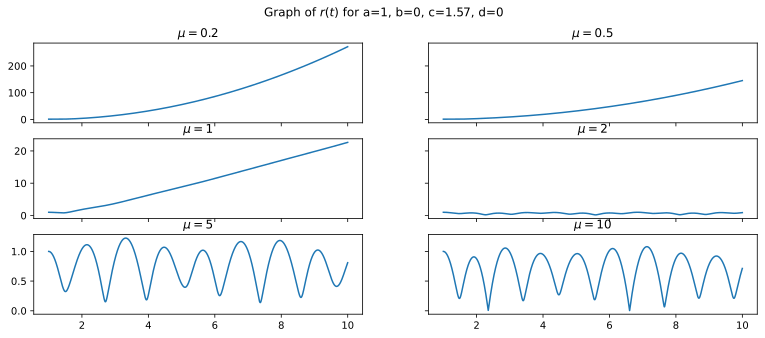

In [11]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey='row')

for i in range(6):
    axes = axes.reshape(6)
    sol = solve_ivp(dSdt, y0=S0, t_span=[1, max(ts)], t_eval=ts, args=[mus[i]])
    axes[i].plot(ts, sol.y[0])
    axes[i].set_title(f'$\mu={mus[i]}$')

fig.suptitle(f'Graph of $r(t)$ for a={S0[0]}, b={S0[1]}, c={S0[2]:.2f}, d={S0[3]}')
plt.show()

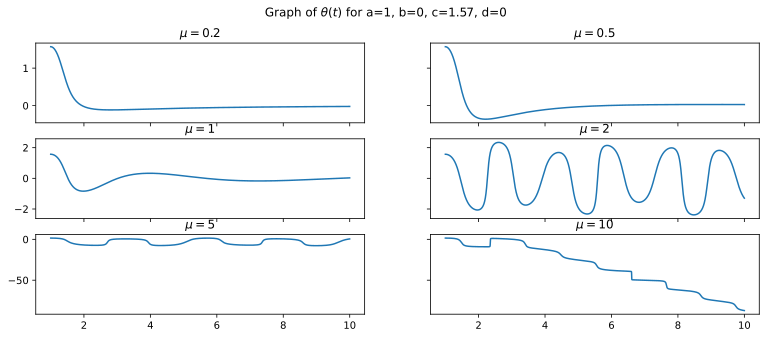

In [12]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey='row')

for i in range(6):
    axes = axes.reshape(6)
    sol = solve_ivp(dSdt, y0=S0, t_span=[1, max(ts)], t_eval=ts, args=[mus[i]])
    axes[i].plot(ts, sol.y[2])
    axes[i].set_title(f'$\mu={mus[i]}$')

fig.suptitle(rf'Graph of $\theta(t)$ for a={S0[0]}, b={S0[1]}, c={S0[2]:.2f}, d={S0[3]}')
plt.show()

Now doing the same but with different initial set values.

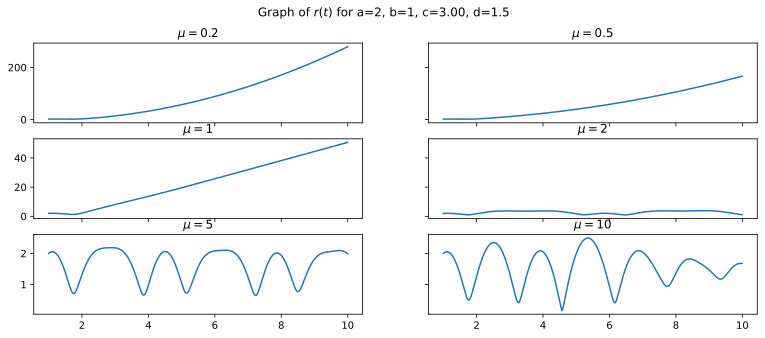

In [13]:
S0 = [2, 1, 3, 1.5]   # new ones
fig, axes = plt.subplots(3, 2, sharex=True, sharey='row')

for i in range(6):
    axes = axes.reshape(6)
    sol = solve_ivp(dSdt, y0=S0, t_span=[1, max(ts)], t_eval=ts, args=[mus[i]])
    axes[i].plot(ts, sol.y[0])
    axes[i].set_title(f'$\mu={mus[i]}$')

fig.suptitle(f'Graph of $r(t)$ for a={S0[0]}, b={S0[1]}, c={S0[2]:.2f}, d={S0[3]}')
plt.show()

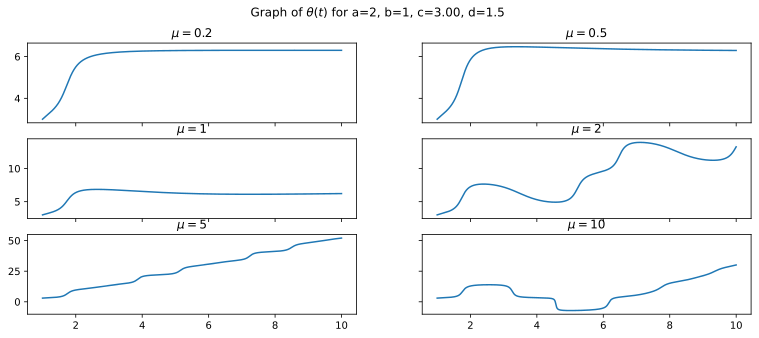

In [14]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey='row')

for i in range(6):
    axes = axes.reshape(6)
    sol = solve_ivp(dSdt, y0=S0, t_span=[1, max(ts)], t_eval=ts, args=[mus[i]])
    axes[i].plot(ts, sol.y[2])
    axes[i].set_title(f'$\mu={mus[i]}$')

fig.suptitle(rf'Graph of $\theta(t)$ for a={S0[0]}, b={S0[1]}, c={S0[2]:.2f}, d={S0[3]}')
plt.show()

## Graph The Phase Diagram; $\dot{r}$ vs. $r$

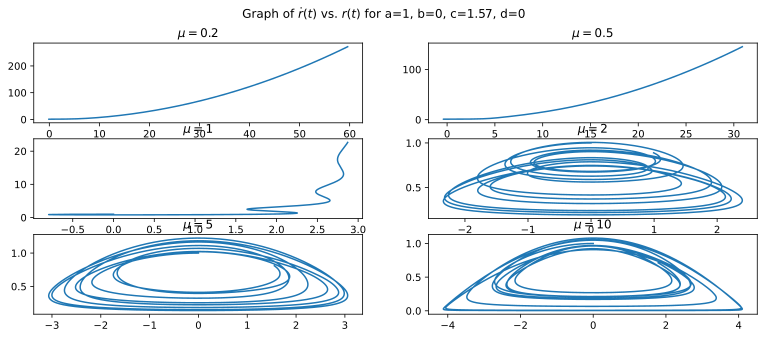

In [18]:
S0 = [1, 0, np.pi/2, 0]   # initials
fig, axes = plt.subplots(3, 2)

for i in range(6):
    axes = axes.reshape(6)
    sol = solve_ivp(dSdt, y0=S0, t_span=[1, max(ts)], t_eval=ts, args=[mus[i]])
    axes[i].plot(sol.y[1], sol.y[0])
    axes[i].set_title(f'$\mu={mus[i]}$')

fig.suptitle(rf'Graph of $\dot{{r}}(t)$ vs. $r(t)$ for a={S0[0]}, b={S0[1]}, c={S0[2]:.2f}, d={S0[3]}')
plt.show()

## Graph The Phase Diagram; $\dot{\theta}$ vs. $r$ in Polar

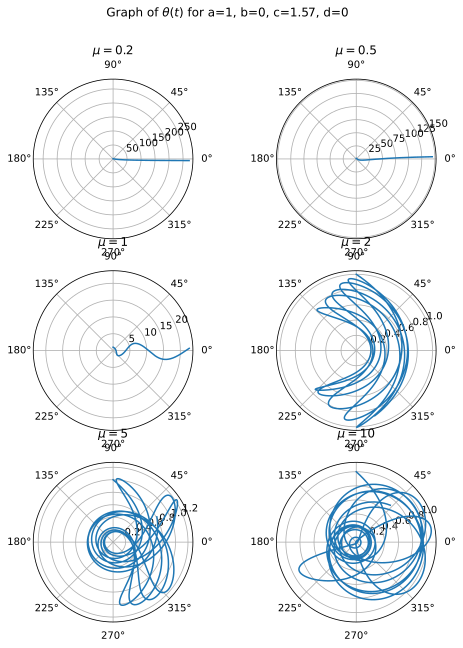

In [16]:
S0 = [1, 0, np.pi/2, 0]   # initials
fig, axes = plt.subplots(3, 2, subplot_kw={'polar': True})

for i in range(6):
    axes = axes.reshape(6)
    sol = solve_ivp(dSdt, y0=S0, t_span=[1, max(ts)], t_eval=ts, args=[mus[i]])
    axes[i].plot(sol.y[2], sol.y[0])
    axes[i].set_title(f'$\mu={mus[i]}$')

fig.suptitle(rf'Graph of $\theta(t)$ for a={S0[0]}, b={S0[1]}, c={S0[2]:.2f}, d={S0[3]}')
fig.set_size_inches(8, 10)
plt.show()

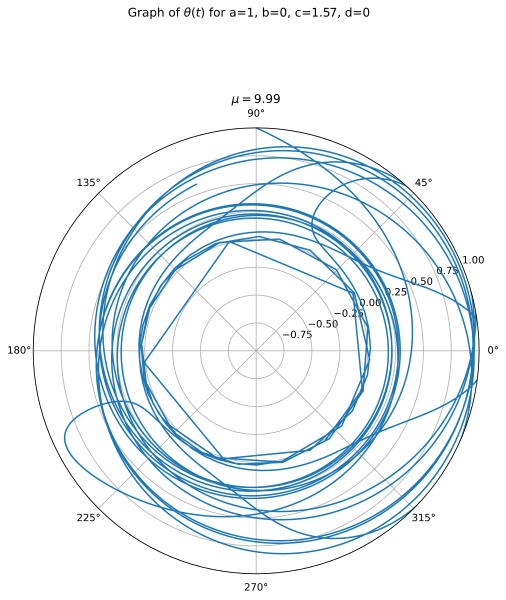

In [17]:
S0 = [1, 0, np.pi/2, 0]   # initials

fig, ax = plt.subplots(subplot_kw={'polar': True})
ln, = ax.plot([], [])
xdata, ydata = [], []

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(i):
    mu = i / 100
    sol = solve_ivp(dSdt, y0=S0, t_span=[1, max(ts)], t_eval=ts, args=[mu])
    ln.set_data(sol.y[2], sol.y[0])
    ax.set_title(f'$\mu={mu}$')
    return ln, 


fig.suptitle(rf'Graph of $\theta(t)$ for a={S0[0]}, b={S0[1]}, c={S0[2]:.2f}, d={S0[3]}')
fig.set_size_inches(8, 10)

anim = FuncAnimation(fig, update, frames=1000, init_func=init, interval=50)
anim.save('test1.gif', writer='pillow', fps=15, dpi=100)